- Fitting and calibration of classifier.
- Classification of unseen data.
- Creation of list of who to send to to maximise expected return, and expected return.

In [1]:
import pandas as pd
import settings
from HelperFunctions import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay, calibration_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [2]:
#loading data
fullTrainData = pd.read_excel(settings.labelledDatapath)
processedTrainData = preprocessDT(fullTrainData)

/home/peter/.local/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
features = processedTrainData.drop(labels=["class"], axis=1)
labels = processedTrainData["class"]
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(features, labels, test_size=0.2, random_state=5)

In [4]:
uncalibrated = RandomForestClassifier(**settings.optimalHyperparameters)
calibratedSigmoid = CalibratedClassifierCV(RandomForestClassifier(**settings.optimalHyperparameters), method="sigmoid")
calibratedIsotonic = CalibratedClassifierCV(RandomForestClassifier(**settings.optimalHyperparameters), method="isotonic")

classifiers = {
    "Uncalibrated": uncalibrated,
    "Sigmoid": calibratedSigmoid,
    "Isotonic": calibratedIsotonic
}

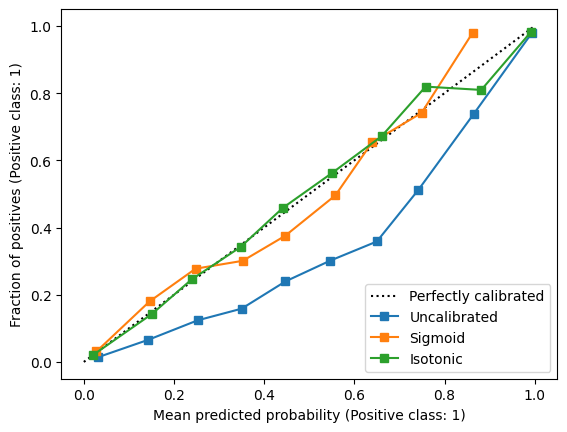

In [5]:
displays = []
axes = plt.gca()
for name, c in classifiers.items():
    c.fit(trainFeatures, trainLabels)
    pred = c.predict_proba(testFeatures)
    #prob_true, prob_pred = calibration_curve(testLabels.to_numpy(), pred[:,1], n_bins=10)
    displays.append(CalibrationDisplay.from_predictions(testLabels.to_numpy(), pred[:,1], n_bins=10, name=name, ax=axes))

plt.show()